In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
dataset = pd.read_csv("train.csv")


In [88]:
dataset.shape

(30, 20)

In [89]:
dataset.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanPurpose,BusnessExperience,FinanceStatement,BusnessNature,Age,Nationality,OtherSourcesIncome
0,LP001002,Male,No,0,Graduate,No,5849,2504,100,360,1,Urban,Y,ImproveCashFlow,Atleast 1year,Profit,Profitable,18,Indigenous,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N,HouseRepair,Lessthan 1year,LossStatement,Profitable,65,Indigenous,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y,Agriculture,Atleast 1year,IncomeStatement,ProfitableProfitable,28,Indigenous,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,0,120,360,1,Urban,N,PurchaseEquipment,Lessthan 1year,FinanceProjection,Profitable,18,Indigenous,N
4,LP001008,Male,No,0,Graduate,No,6000,1300,141,360,1,Urban,Y,PayExpansionProject,Atleast 1year,FinanceProjection,Profitable,38,Indigenous,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,0,267,360,1,Urban,Y,PurchaseInventory,Lessthan 1year,Profit,Profitable,30,Indigenous,N
6,LP001013,Male,Yes,0,Not Graduate,No,2333,0,95,360,1,Urban,N,NonProfitBusness,Lessthan 1year,IncomeStatement,NonProfitable,18,Indigenous,Y
7,LP001014,Male,Yes,2,Graduate,No,3036,2504,158,360,0,Semiurban,N,UseasPayroll,Atleast 1year,Profit,Profitable,65,Indigenous,Y
8,LP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,N,BuyAsset,Atleast 1year,FinanceProjection,Profitable,17,Foreigner,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N,ClearDebt,Lessthan 1year,LossStatement,Profitable,80,Indigenous,N


In [90]:
dataset.describe() 

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Age
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.866667,4180.933333,2387.066667,142.933333,348.000000,0.766667,36.400000
std,0.899553,2513.309289,6856.938901,75.559948,48.309348,0.430183,20.939321
min,0.000000,0.000000,0.000000,17.000000,120.000000,0.000000,17.000000
25%,0.000000,2649.750000,0.000000,105.250000,360.000000,1.000000,18.000000
50%,1.000000,3437.500000,0.000000,118.000000,360.000000,1.000000,29.000000
75%,2.000000,4980.000000,1981.250000,156.250000,360.000000,1.000000,47.000000
max,2.000000,12841.000000,36665.000000,349.000000,360.000000,1.000000,80.000000


In [91]:
dataset.shape

(30, 20)

In [92]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0,7,0,7
1,9,14,23
All,16,14,30


<AxesSubplot:>

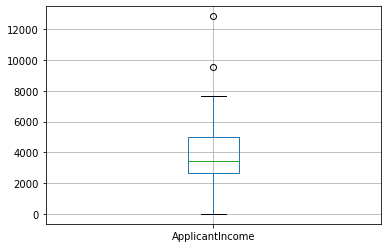

In [93]:
#Graphs of boxplot used to detect the outliers(OUTLIERS->datapoint that differs significantly from other observations/observation that liers abnormal distance from other values) 
dataset.boxplot(column='ApplicantIncome')

<AxesSubplot:>

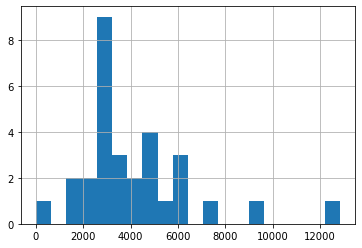

In [94]:
#The graph used to show that we have to normalize the values 
dataset['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

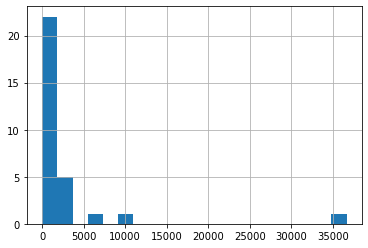

In [95]:
dataset['CoapplicantIncome'].hist(bins=20)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

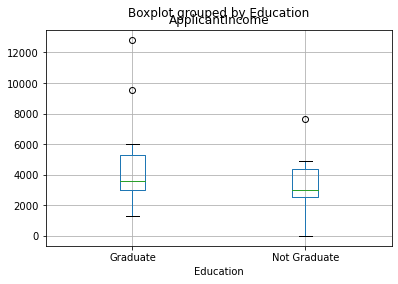

In [96]:
#The graph show the relationship btn ApplicantIncome and Education
dataset.boxplot(column='ApplicantIncome', by='Education')

<AxesSubplot:>

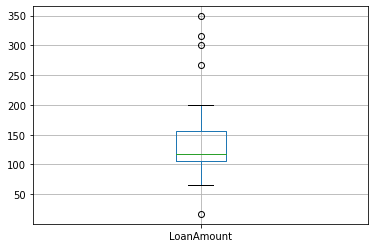

In [97]:
 #The graph again show outliers which needed to be handled
dataset.boxplot(column='LoanAmount')

<AxesSubplot:>

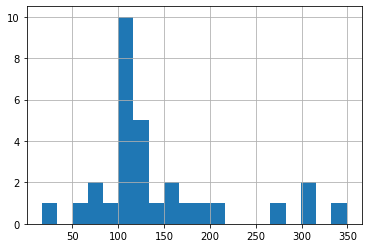

In [98]:
#The graph show the loanamount where applicants are concentrated, Needs to be normalized
#dataset.hist(column='LoanAmount', bins=20)
dataset['LoanAmount'].hist(bins=20)

In [99]:
#Normalize the dataset...by apply the Logarithmic functions so as to nullfy the effects of outliers
dataset['LoanAmount_log'] =np.log(dataset['LoanAmount'])

<AxesSubplot:>

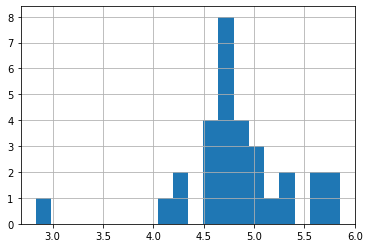

In [100]:
dataset['LoanAmount_log'].hist(bins=20)

In [101]:
#Ask the missing values inside the datasets
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanPurpose           0
BusnessExperience     0
FinanceStatement      0
BusnessNature         0
Age                   0
Nationality           0
OtherSourcesIncome    0
LoanAmount_log        0
dtype: int64

In [102]:
#dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)


In [103]:
#dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)

In [104]:
#dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)

In [105]:
#dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)

In [106]:
#dataset.LoanAmount=dataset.LoanAmount.fillna(dataset.LoanAmount.mean())

In [107]:
#dataset.LoanAmount_log=dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.mean())

In [108]:
#dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)

In [109]:
#dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

In [110]:
#dataset['LoanPurpose'].fillna(dataset['LoanPurpose'].mode()[0], inplace=True)

In [111]:
#dataset['BusnessExperience'].fillna(dataset['BusnessExperience'].mode()[0], inplace=True)

In [112]:
#dataset['FinanceStatement'].fillna(dataset['FinanceStatement'].mode()[0], inplace=True)

In [113]:
#dataset['BusnessNature'].fillna(dataset['BusnessNature'].mode()[0], inplace=True)

In [114]:
#dataset['Age'].fillna(dataset['Age'].mode()[0], inplace=True)

In [115]:
#dataset['Nationality'].fillna(dataset['Nationality'].mode()[0], inplace=True)

In [116]:
#dataset['OtherSourcesIncome'].fillna(dataset['OtherSourcesIncome'].mode()[0], inplace=True)

In [117]:
#dataset.isnull().sum()

In [118]:
dataset.shape

(30, 21)

In [119]:
#Adding another column
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['TotalIncome_log']=np.log(dataset['TotalIncome'])

C:\Users\JackMihayo\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [120]:
#dataset['TotalIncome_log'].hist(bins=20)

In [121]:
dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,LoanPurpose,BusnessExperience,FinanceStatement,BusnessNature,Age,Nationality,OtherSourcesIncome,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,2504,100,360,...,ImproveCashFlow,Atleast 1year,Profit,Profitable,18,Indigenous,Y,4.605170,8353,9.030376
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,...,HouseRepair,Lessthan 1year,LossStatement,Profitable,65,Indigenous,Y,4.852030,6091,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,...,Agriculture,Atleast 1year,IncomeStatement,ProfitableProfitable,28,Indigenous,Y,4.189655,3000,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,0,120,360,...,PurchaseEquipment,Lessthan 1year,FinanceProjection,Profitable,18,Indigenous,N,4.787492,2583,7.856707
4,LP001008,Male,No,0,Graduate,No,6000,1300,141,360,...,PayExpansionProject,Atleast 1year,FinanceProjection,Profitable,38,Indigenous,Y,4.948760,7300,8.895630


<AxesSubplot:>

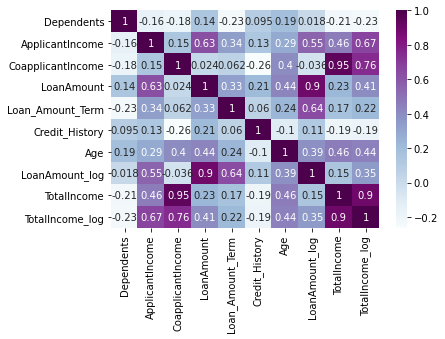

In [122]:
#-> is a table showing correlation coefficients between variables.
#->Each cell in the table shows the correlation between two variables
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap="BuPu")

# Converting the String into encoder that  Model can  understand

In [123]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset=dataset.apply(le.fit_transform)

In [124]:
#input & output variables
#x->for independent variables(Criteria area creditHistory, Education, HigherApplicant&CoApplicant & Gender in 80%)
#y->for dependent variables(Self_Employed  in 20%)
#x=dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
#independent Variables include(Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmounterm
# LoanPurpose,BusnessExperience, FinaceStatement, BusnessNature, Age, Nationality, ApplicantIncome and TotalIncome)
x=dataset.iloc[:,np.r_[4:9,11,13:22]].values
y=dataset.iloc[:,12].values


#x = dataset.iloc[:, [6,13,14,16,17,18,19]]
#y = dataset.iloc[:, [1,2,4,5]]
#x=dataset[['LoanPurpose', 'BusnessExperience', 'BusnessNature', 'Age', 'Nationality', 'ApplicantIncome']]
#y=dataset[['Education', 'Gender', 'Self_Employed', 'Married']]

In [125]:
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,LoanPurpose,BusnessExperience,FinanceStatement,BusnessNature,Age,Nationality,OtherSourcesIncome,LoanAmount_log,TotalIncome,TotalIncome_log
0,0,1,0,0,0,0,22,8,5,2,...,5,0,3,4,1,1,1,5,24,24
1,1,1,1,1,0,0,17,4,16,2,...,4,1,2,4,9,1,1,16,20,20
2,2,1,1,0,0,1,8,0,1,2,...,0,0,1,5,3,1,1,1,6,6
3,3,1,1,0,1,0,5,0,13,2,...,8,1,0,4,1,1,0,13,4,4
4,4,1,0,0,0,0,24,3,18,2,...,7,0,0,4,5,1,1,18,22,22
5,5,1,1,2,0,1,21,0,24,2,...,9,1,3,4,4,1,0,24,17,17
6,6,1,1,0,1,0,3,0,4,2,...,6,1,1,2,1,1,1,4,1,1
7,7,1,1,2,0,0,9,8,20,2,...,10,0,3,4,9,1,1,20,19,19
8,8,1,1,2,0,0,15,5,21,2,...,1,0,0,4,0,0,1,21,18,18
9,9,1,1,1,0,0,27,11,27,2,...,2,1,2,4,11,1,0,27,27,27


In [126]:
x

array([[ 0,  0, 22,  8,  5,  2,  5,  0,  3,  4,  1,  1,  1,  5, 24],
       [ 0,  0, 17,  4, 16,  0,  4,  1,  2,  4,  9,  1,  1, 16, 20],
       [ 0,  1,  8,  0,  1,  2,  0,  0,  1,  5,  3,  1,  1,  1,  6],
       [ 1,  0,  5,  0, 13,  2,  8,  1,  0,  4,  1,  1,  0, 13,  4],
       [ 0,  0, 24,  3, 18,  2,  7,  0,  0,  4,  5,  1,  1, 18, 22],
       [ 0,  1, 21,  0, 24,  2,  9,  1,  3,  4,  4,  1,  0, 24, 17],
       [ 1,  0,  3,  0,  4,  2,  6,  1,  1,  2,  1,  1,  1,  4,  1],
       [ 0,  0,  9,  8, 20,  1, 10,  0,  3,  4,  9,  1,  1, 20, 19],
       [ 0,  0, 15,  5, 21,  2,  1,  0,  0,  4,  0,  0,  1, 21, 18],
       [ 0,  0, 27, 11, 27,  1,  2,  1,  2,  4, 11,  1,  0, 27, 27],
       [ 0,  0, 11,  1,  2,  2, 11,  0,  0,  4,  3,  1,  1,  2, 11],
       [ 0,  1,  4,  0,  7,  2,  3,  0,  3,  4,  3,  1,  1,  7,  3],
       [ 0,  0, 10,  0, 23,  2,  5,  0,  0,  4,  8,  1,  0, 23,  8],
       [ 0,  0,  2,  9, 10,  0,  0,  0,  3,  4,  5,  1,  0, 10, 13],
       [ 0,  0,  1,  2,  0,  2,  2

In [127]:
y

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1])

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [129]:
print(x_train)

[[ 1  0 16  0  8  2  2  0  1  4  1  1  1  8 12]
 [ 0  1  4  0  7  2  3  0  3  4  3  1  1  7  3]
 [ 0  0 13 12  3  2  0  1  2  3  9  1  0  3 28]
 [ 1  0  6  0 12  1  8  0  1  2  1  1  1 12  5]
 [ 0  1 21  0 24  2  9  1  3  4  4  1  0 24 17]
 [ 1  0  0  0  5  2  0  0  3  3  0  1  1  5  0]
 [ 0  0 15  5 21  2  1  0  0  4  0  0  1 21 18]
 [ 0  0  1  2  0  2  2  1  2  2  0  1  1  0  2]
 [ 1  0 12  0  9  0  4  0  3  0 11  1  0  9  9]
 [ 1  0 25  0  6  2  2  0  0  4  1  1  1  6 23]
 [ 0  0 17  4 16  0  4  1  2  4  9  1  1 16 20]
 [ 0  1 20  0 25  2  5  0  3  4  6  1  1 25 15]
 [ 1  0  3  0  4  2  6  1  1  2  1  1  1  4  1]
 [ 0  0 24  3 18  2  7  0  0  4  5  1  1 18 22]
 [ 1  0 18  0 17  0  8  0  0  4  1  1  1 17 14]
 [ 0  1  6  0 11  2  4  0  3  2  4  0  0 11  5]
 [ 0  0 27 11 27  1  2  1  2  4 11  1  0 27 27]
 [ 0  0  9  8 20  1 10  0  3  4  9  1  1 20 19]
 [ 0  1 26  0 22  1  0  0  3  4  4  1  1 22 25]
 [ 1  0  5  0 13  2  8  1  0  4  1  1  0 13  4]
 [ 0  0 22  8  5  2  5  0  3  4  1  1  1

In [130]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

In [131]:
#Navigate the label encoding thru specific x_train values 
for i in range(0, 5):
    x_train[:,i] = labelencoder_x.fit_transform(x_train[:,i])

In [132]:
x_train[:,7]= labelencoder_x.fit_transform(x_train[:,7])

In [133]:
x_train

array([[ 1,  0, 11,  0,  6,  2,  2,  0,  1,  4,  1,  1,  1,  8, 12],
       [ 0,  1,  3,  0,  5,  2,  3,  0,  3,  4,  3,  1,  1,  7,  3],
       [ 0,  0,  9,  9,  1,  2,  0,  1,  2,  3,  9,  1,  0,  3, 28],
       [ 1,  0,  5,  0,  9,  1,  8,  0,  1,  2,  1,  1,  1, 12,  5],
       [ 0,  1, 16,  0, 19,  2,  9,  1,  3,  4,  4,  1,  0, 24, 17],
       [ 1,  0,  0,  0,  3,  2,  0,  0,  3,  3,  0,  1,  1,  5,  0],
       [ 0,  0, 10,  4, 16,  2,  1,  0,  0,  4,  0,  0,  1, 21, 18],
       [ 0,  0,  1,  1,  0,  2,  2,  1,  2,  2,  0,  1,  1,  0,  2],
       [ 1,  0,  8,  0,  7,  0,  4,  0,  3,  0, 11,  1,  0,  9,  9],
       [ 1,  0, 20,  0,  4,  2,  2,  0,  0,  4,  1,  1,  1,  6, 23],
       [ 0,  0, 12,  3, 12,  0,  4,  1,  2,  4,  9,  1,  1, 16, 20],
       [ 0,  1, 15,  0, 20,  2,  5,  0,  3,  4,  6,  1,  1, 25, 15],
       [ 1,  0,  2,  0,  2,  2,  6,  1,  1,  2,  1,  1,  1,  4,  1],
       [ 0,  0, 19,  2, 14,  2,  7,  0,  0,  4,  5,  1,  1, 18, 22],
       [ 1,  0, 13,  0, 13,  0,  8

In [134]:
labelencoder_y = LabelEncoder()

In [135]:
y_train = labelencoder_y.fit_transform(y_train)

In [136]:
y_train

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [137]:
for i in range(0, 5):
    x_test[:,i] = labelencoder_x.fit_transform(x_test[:,i])

In [138]:
x_test[:,7]= labelencoder_x.fit_transform(x_test[:,7])

In [139]:
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [140]:
x_test

array([[ 0,  1,  2,  0,  0,  2,  0,  0,  1,  5,  3,  1,  1,  1,  6],
       [ 0,  1,  3,  0,  3,  0,  1,  0,  3,  4,  2,  1,  1, 12,  7],
       [ 0,  0,  0,  3,  2,  0,  0,  0,  3,  4,  5,  1,  0, 10, 13],
       [ 0,  0,  4,  1,  1,  2, 11,  0,  0,  4,  3,  1,  1,  2, 11],
       [ 0,  0,  1,  2,  4,  1,  5,  1,  3,  4,  7,  1,  0, 14, 16],
       [ 0,  1,  5,  0,  5,  1,  7,  1,  2,  2, 10,  0,  0, 19, 10]],
      dtype=int64)

In [141]:
y_test

array([1, 1, 1, 1, 1, 0], dtype=int64)

In [142]:
#Standard Scale
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

# ALGORITHM & ACCURACY

In [155]:
#introduce trained data to Decision Tree classifier Algorithm
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [156]:
#The model predict these data
y_pred_D = DTClassifier.predict(x_test)
y_pred_D

array([1, 1, 0, 0, 1, 1], dtype=int64)

In [157]:

print('The accuracy of DecisionTree is: ', metrics.accuracy_score(y_pred_D, y_test)*100) 

The accuracy of DecisionTree is:  50.0


In [158]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(x_train, y_train)

GaussianNB()

In [159]:
y_pred_N = NBClassifier.predict(x_test)

In [160]:
y_pred_N

array([1, 1, 0, 0, 0, 1], dtype=int64)

In [161]:
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score(y_pred_N, y_test)*100)

The accuracy of Naive Bayes is:  33.33333333333333


In [166]:
from sklearn.ensemble import RandomForestClassifier
RandFclassifier = RandomForestClassifier(n_estimators=30)
RandFclassifier.fit(x_train, y_train)
y_pred_R =RandFclassifier.predict(x_test)
y_pred_R

array([0, 1, 0, 0, 0, 1], dtype=int64)

In [167]:
print('The accuracy of Random Forest is: ', metrics.accuracy_score(y_pred_R, y_test)*100)

The accuracy of Random Forest is:  16.666666666666664


In [168]:
from sklearn.ensemble import ExtraTreesClassifier
Extratreesclassifier = ExtraTreesClassifier()
Extratreesclassifier.fit(x_train, y_train)
y_pred_E =Extratreesclassifier.predict(x_test)
y_pred_E
print('The accuracy of ExtraTrees is: ', metrics.accuracy_score(y_pred_E, y_test)*100)

The accuracy of ExtraTrees is:  16.666666666666664


# CONFUSION MATRIX

In [169]:
#->Monitoring & Manage the model performance classification 
#->summary of prediction results on classification problem, number of correct and incorrect
#->predictions  are summarized count values and broken values by each class 
#->It gives us the insight not only to the errors being made by classifier 
#->More important gives the type of errors are being made
DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(x_train, y_train)
from sklearn.metrics import confusion_matrix
y_pred = DTClassifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 1],
       [2, 3]], dtype=int64)

<AxesSubplot:>

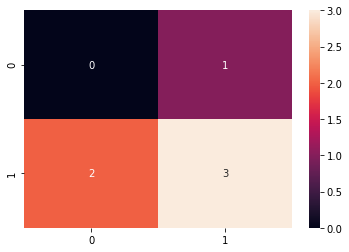

In [172]:
#Predicted value vs Actual Value
sns.heatmap(cm, annot=True)

# TESTING

In [70]:
testdata = pd.read_csv('test.csv')

In [71]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanPurpose,BusnessExperience,FinanceStatement,BusnessNature,Age,Nationality,OtherSourcesIncome
0,LP001002,Male,No,0,Graduate,No,5849,2504,100,360,1,Urban,Y,ImproveCashFlow,Atleast 1year,Profit,Profitable,Max 18,Indigenous,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N,HouseRepair,Lessthan 1year,LossStatement,Profitable,Max 65,Indigenous,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y,Agriculture,Atleast 1year,IncomeStatement,ProfitableProfitable,Max 18,Indigenous,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,0,120,360,1,Urban,N,PurchaseEquipment,Lessthan 1year,FinanceProjection,Profitable,Min 18,Indigenous,N
4,LP001008,Male,No,0,Graduate,No,6000,1300,141,360,1,Urban,Y,PayExpansionProject,Atleast 1year,FinanceProjection,Profitable,Max 18,Indigenous,Y


In [72]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Loan_ID             30 non-null     object
 1   Gender              30 non-null     object
 2   Married             30 non-null     object
 3   Dependents          30 non-null     int64 
 4   Education           30 non-null     object
 5   Self_Employed       30 non-null     object
 6   ApplicantIncome     30 non-null     int64 
 7   CoapplicantIncome   30 non-null     int64 
 8   LoanAmount          30 non-null     int64 
 9   Loan_Amount_Term    30 non-null     int64 
 10  Credit_History      30 non-null     int64 
 11  Property_Area       30 non-null     object
 12  Loan_Status         30 non-null     object
 13  LoanPurpose         30 non-null     object
 14  BusnessExperience   30 non-null     object
 15  FinanceStatement    30 non-null     object
 16  BusnessNature       30 non-n

In [73]:
testdata.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanPurpose           0
BusnessExperience     0
FinanceStatement      0
BusnessNature         0
Age                   0
Nationality           0
OtherSourcesIncome    0
dtype: int64

In [74]:
#testdata['Gender'].fillna(testdata['Gender'].mode()[0], inplace=True)
#testdata['Dependents'].fillna(testdata['Dependents'].mode()[0], inplace=True)
#testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0], inplace=True)
#testdata['LoanAmount'].fillna(testdata['LoanAmount'].mean(), inplace=True)
#testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mean(), inplace=True)
#testdata['Credit_History'].fillna(testdata['Credit_History'].mean(), inplace=True)


In [75]:
testdata.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanPurpose           0
BusnessExperience     0
FinanceStatement      0
BusnessNature         0
Age                   0
Nationality           0
OtherSourcesIncome    0
dtype: int64

<AxesSubplot:>

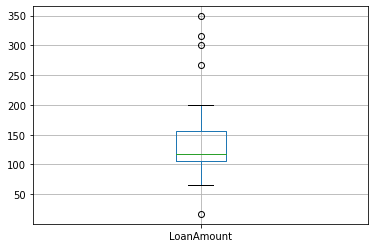

In [76]:
testdata.boxplot(column='LoanAmount')

In [77]:
testdata['LoanAmount_log']= np.log(testdata['LoanAmount'])


In [78]:
testdata.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanPurpose           0
BusnessExperience     0
FinanceStatement      0
BusnessNature         0
Age                   0
Nationality           0
OtherSourcesIncome    0
LoanAmount_log        0
dtype: int64

In [79]:
testdata['TotalIncome'] = testdata['ApplicantIncome'] + testdata['CoapplicantIncome']
testdata['Totalncome_log'] = np.log(testdata['TotalIncome'])

C:\Users\JackMihayo\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [80]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,LoanPurpose,BusnessExperience,FinanceStatement,BusnessNature,Age,Nationality,OtherSourcesIncome,LoanAmount_log,TotalIncome,Totalncome_log
0,LP001002,Male,No,0,Graduate,No,5849,2504,100,360,...,ImproveCashFlow,Atleast 1year,Profit,Profitable,Max 18,Indigenous,Y,4.605170,8353,9.030376
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,...,HouseRepair,Lessthan 1year,LossStatement,Profitable,Max 65,Indigenous,Y,4.852030,6091,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,...,Agriculture,Atleast 1year,IncomeStatement,ProfitableProfitable,Max 18,Indigenous,Y,4.189655,3000,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,0,120,360,...,PurchaseEquipment,Lessthan 1year,FinanceProjection,Profitable,Min 18,Indigenous,N,4.787492,2583,7.856707
4,LP001008,Male,No,0,Graduate,No,6000,1300,141,360,...,PayExpansionProject,Atleast 1year,FinanceProjection,Profitable,Max 18,Indigenous,Y,4.948760,7300,8.895630


In [81]:
#test = testdata.iloc[:,np.r_[1:5,9:11,13:15]].values
test=testdata.iloc[:,np.r_[4:9,11,13:22]].values

In [82]:
for i in range(0, 5):
    test[:,i]=labelencoder_x.fit_transform(test[:,i])

In [83]:
test[:,7] = labelencoder_x.fit_transform(test[:,7])
test

array([[0, 0, 22, 8, 5, 'Urban', 'ImproveCashFlow', 0, 'Profit',
        'Profitable', 'Max  18', 'Indigenous', 'Y', 4.605170185988092,
        8353],
       [0, 0, 17, 4, 16, 'Rural', 'HouseRepair', 1, 'LossStatement',
        'Profitable', 'Max 65', 'Indigenous', 'Y', 4.852030263919617,
        6091],
       [0, 1, 8, 0, 1, 'Urban', 'Agriculture', 0, 'IncomeStatement',
        'ProfitableProfitable', 'Max  18', 'Indigenous', 'Y',
        4.189654742026425, 3000],
       [1, 0, 5, 0, 13, 'Urban', 'PurchaseEquipment', 1,
        'FinanceProjection', 'Profitable', 'Min  18', 'Indigenous', 'N',
        4.787491742782046, 2583],
       [0, 0, 24, 3, 18, 'Urban', 'PayExpansionProject', 0,
        'FinanceProjection', 'Profitable', 'Max 18', 'Indigenous', 'Y',
        4.948759890378168, 7300],
       [0, 1, 21, 0, 24, 'Urban', 'PurchaseInventory', 1, 'Profit',
        'Profitable', 'Max 18', 'Indigenous', 'N', 5.58724865840025,
        5417],
       [1, 0, 3, 0, 4, 'Urban', 'NonProfitBusnes

# Save, Dump and Load Model

In [95]:
import pickle
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [96]:

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(DTClassifier, open(filename, 'wb'))
 


In [97]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)